## Task #4: Apply DBSCAN

In [ ]:
# DBSCAN
from sklearn.cluster import DBSCAN

# k nearest neighburs 
from sklearn.neighbors import NearestNeighbors

In [ ]:
# ANSWER
min_pnts = 4

In [ ]:
def find_optimal_eps(data, min_pts):
    # Calculate distances to k-nearest neighbors
    neigh = NearestNeighbors(n_neighbors=min_pts)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)
    
    
    # Sort distances to kth neighbor in ascending order
    k_distances = np.sort(distances[:, min_pts-1])
    
    # Create plot
    fig = px.line(
        x=range(len(k_distances)),
        y=k_distances,
        title=f'K-distance Graph (k={min_pts})',
        labels={'x': 'Points sorted by distance', 
                'y': f'Distance to {min_pts}th nearest neighbor'}
    )
    
    return fig

In [ ]:
# ANSWER
fig = find_optimal_eps(scaled_data, min_pnts)
fig.show() # display the plot

In [ ]:
# ANSWER
best_eps = 0.13
best_min_samples = 4
# Apply DBSCAN with best parameters
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_dbscan.fit_predict(scaled_data)

In [ ]:
data_sample['cluster dbscan'] = best_labels
data_sample['silhouette dbscan'] = silhouette_samples(scaled_data, best_labels, metric='euclidean')
data_sample

,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,...,date_upload_day,date_upload_month,date_upload_year,Unnamed: 16,Unnamed: 17,Unnamed: 18,k-means labels,silhouette kmeans,cluster dbscan,silhouette dbscan
85599,13775211893,47445822@N02,45.747948,4.825830,"alpes,graffiti,lyon,express,ng,perrache,zapp,s...",Z24500 avec graffiti,12.0,11,11,4,...,11.0,4,2014.0,NaN,NaN,NaN,6,0.127836,0,-0.033178
187362,45136409892,61949122@N06,45.758181,4.831967,"ngc,lyon,paysage,landscape,saone",Balade sur les quais de Saône,28.0,16,19,9,...,8.0,10,2018.0,NaN,NaN,NaN,1,0.515582,0,0.471424
119629,23921771679,86250667@N08,45.763105,4.810386,"architecture,lyon,tombe,cimetière","2015-11-08 - Lyon, Cimetière de Loyasse (316),...",30.0,17,8,11,...,10.0,1,2016.0,NaN,NaN,NaN,19,0.226976,0,-0.641319
126712,29160108882,9270438@N06,45.761273,4.827622,"lyon,saintjean",Rue Mandelot,36.0,16,27,8,...,27.0,8,2016.0,NaN,NaN,NaN,1,0.505917,0,0.378622
140299,35239751260,113391938@N03,45.765041,4.861697,NaN,NaN,20.0,11,30,6,...,30.0,6,2017.0,NaN,NaN,NaN,8,0.285372,0,-0.453340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125689,27727408624,26108506@N03,45.769938,4.829816,NaN,20160716_121344,13.0,12,16,7,...,16.0,7,2016.0,NaN,NaN,NaN,9,0.544082,0,0.333235
143130,35007587706,40936370@N00,45.837440,4.826388,"abodeofchaos,chaos,lespritdelasalamandre,salam...","Regard de thierry Ehrmann, auteur de la Demeur...",40.0,9,2,6,...,2.0,6,2017.0,NaN,NaN,NaN,2,0.969104,1,0.977855
76137,10649693293,49141667@N03,45.772005,4.832825,"lyon,tags",IMG_2614,56.0,16,26,10,...,3.0,11,2013.0,NaN,NaN,NaN,9,0.629662,0,0.359148
114823,22650736803,9423727@N02,45.729712,4.824991,NaN,Nightwish à Lyon-47,23.0,0,25,11,...,24.0,11,2015.0,NaN,NaN,NaN,12,0.446069,0,-0.470254


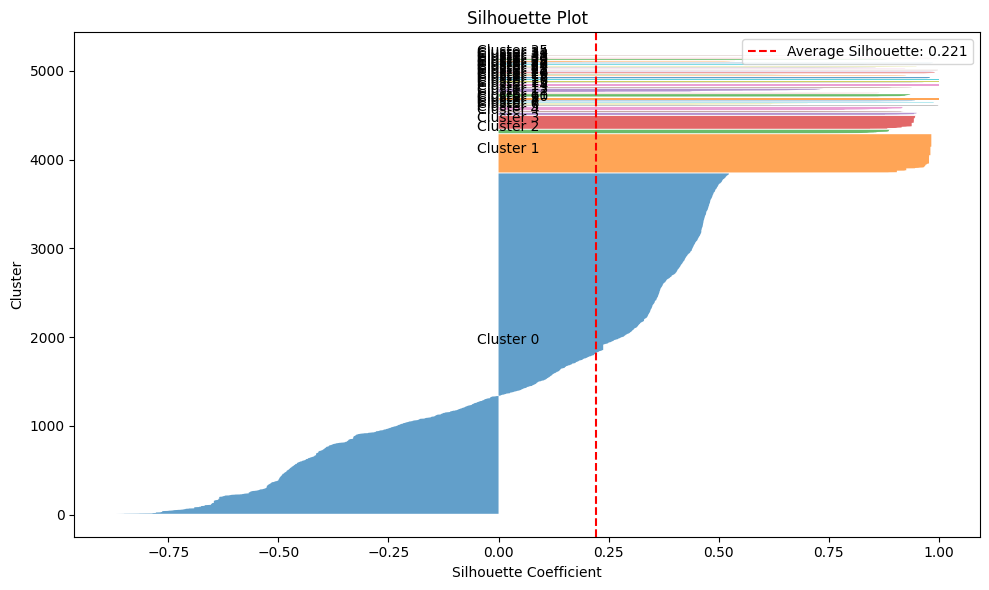

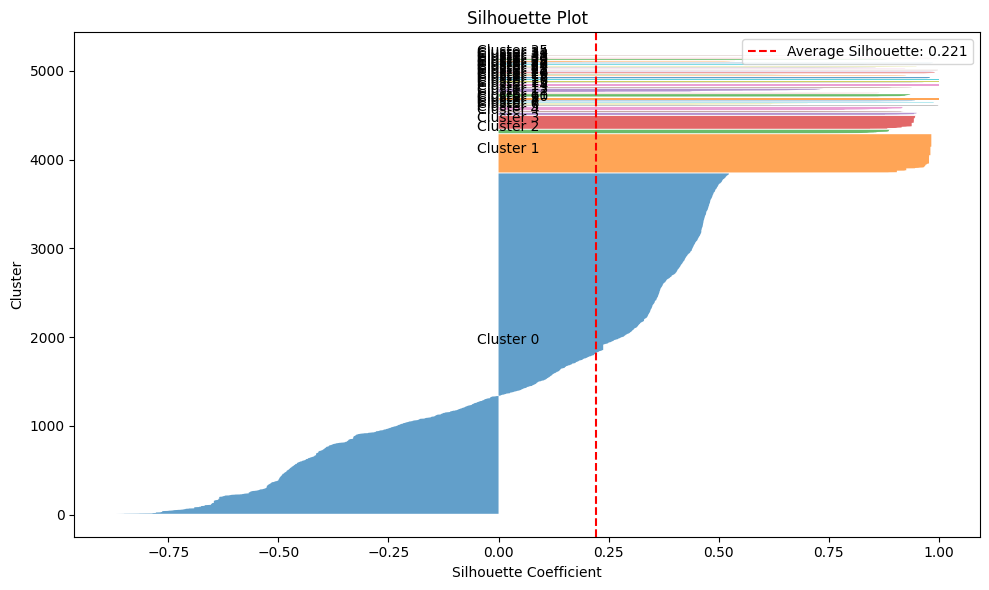

In [ ]:
plot_silhouette(data_sample['silhouette dbscan'].values, silhouette_score(scaled_data, best_labels, metric='euclidean'), best_labels, n_clusters=len(set(best_labels)) - (1 if -1 in best_labels else 0))

In [ ]:
data_sample.groupby('cluster dbscan')['silhouette dbscan'].mean()

cluster dbscan
-1    -0.836978
 0     0.092983
 1     0.971304
 2     0.866021
 3     0.934495
 4     0.917610
 5     0.873884
 6     0.870123
 7     0.997303
 8     0.596430
 9     0.988208
 10    0.924525
 11    1.000000
 12    0.895047
 13    0.828853
 14    0.565858
 15    0.907013
 16    1.000000
 17    0.953600
 18    1.000000
 19    1.000000
 20    0.967742
 21    0.906775
 22    0.554790
 23    0.984938
 24    0.985163
 25    0.996693
 26    0.885963
 27    0.816750
 28    0.922307
 29    0.750908
 30    0.983915
 31    0.394161
 32    0.788736
 33    0.997534
 34    1.000000
 35    0.781907
Name: silhouette dbscan, dtype: float64

## Task #4.1: Apply DBSCAN on the first two clusters

In [ ]:
# filtering the cluster 0 and 1

filtered_data_dsbcan = data_sample[(data_sample['cluster dbscan'] == 0) | (data_sample['cluster dbscan'] == 1)]
filtered_data_dsbcan

,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,...,date_upload_day,date_upload_month,date_upload_year,Unnamed: 16,Unnamed: 17,Unnamed: 18,k-means labels,silhouette kmeans,cluster dbscan,silhouette dbscan
85599,13775211893,47445822@N02,45.747948,4.825830,"alpes,graffiti,lyon,express,ng,perrache,zapp,s...",Z24500 avec graffiti,12.0,11,11,4,...,11.0,4,2014.0,NaN,NaN,NaN,6,0.127836,0,-0.033178
187362,45136409892,61949122@N06,45.758181,4.831967,"ngc,lyon,paysage,landscape,saone",Balade sur les quais de Saône,28.0,16,19,9,...,8.0,10,2018.0,NaN,NaN,NaN,1,0.515582,0,0.471424
119629,23921771679,86250667@N08,45.763105,4.810386,"architecture,lyon,tombe,cimetière","2015-11-08 - Lyon, Cimetière de Loyasse (316),...",30.0,17,8,11,...,10.0,1,2016.0,NaN,NaN,NaN,19,0.226976,0,-0.641319
126712,29160108882,9270438@N06,45.761273,4.827622,"lyon,saintjean",Rue Mandelot,36.0,16,27,8,...,27.0,8,2016.0,NaN,NaN,NaN,1,0.505917,0,0.378622
140299,35239751260,113391938@N03,45.765041,4.861697,NaN,NaN,20.0,11,30,6,...,30.0,6,2017.0,NaN,NaN,NaN,8,0.285372,0,-0.453340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125689,27727408624,26108506@N03,45.769938,4.829816,NaN,20160716_121344,13.0,12,16,7,...,16.0,7,2016.0,NaN,NaN,NaN,9,0.544082,0,0.333235
143130,35007587706,40936370@N00,45.837440,4.826388,"abodeofchaos,chaos,lespritdelasalamandre,salam...","Regard de thierry Ehrmann, auteur de la Demeur...",40.0,9,2,6,...,2.0,6,2017.0,NaN,NaN,NaN,2,0.969104,1,0.977855
76137,10649693293,49141667@N03,45.772005,4.832825,"lyon,tags",IMG_2614,56.0,16,26,10,...,3.0,11,2013.0,NaN,NaN,NaN,9,0.629662,0,0.359148
114823,22650736803,9423727@N02,45.729712,4.824991,NaN,Nightwish à Lyon-47,23.0,0,25,11,...,24.0,11,2015.0,NaN,NaN,NaN,12,0.446069,0,-0.470254


In [ ]:
# ANSWER
min_pnts = 4

In [ ]:
df_clustering_filtered = filtered_data_dsbcan.drop(columns_to_drop , axis=1)
# Scale the data
scaler = StandardScaler()
scaled_data_filtered = scaler.fit_transform(df_clustering_filtered)
# show
print(scaled_data_filtered)


[[-0.8432774  -0.62608736  0.06373061 -1.54050688 -0.33567254 -0.47653581]
 [-0.44468301 -0.1690112  -0.99662347  0.12390798 -0.33567254  0.64134031]
 [-0.25288406 -1.77633737  2.82065123 -1.11494527 -0.33567254 -1.82378736]
 ...
 [ 0.0937875  -0.10510842  0.69994306  0.6136003  -0.33567254  0.39260904]
 [-1.55360351 -0.68857505  1.33615551 -0.17447731 -0.33567254 -1.44481469]
 [-0.47818161  0.45102449  0.48787224 -1.71578264 -0.33567254  0.17730822]]


In [ ]:
# ANSWER
fig = find_optimal_eps(scaled_data_filtered, min_pnts)
fig.show() # display the plot

In [ ]:
# ANSWER
best_eps = 0.05
best_min_samples = 4
# Apply DBSCAN with best parameters
best_dbscan_filtered = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels_filtered = best_dbscan_filtered.fit_predict(scaled_data_filtered)

In [ ]:
filtered_data_dsbcan['cluster dbscan'] = best_labels_filtered
filtered_data_dsbcan['silhouette dbscan'] = silhouette_samples(scaled_data_filtered, best_labels_filtered, metric='euclidean')
filtered_data_dsbcan

C:\Users\bdosanjosg\AppData\Local\Temp\ipykernel_14008\1479139782.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\bdosanjosg\AppData\Local\Temp\ipykernel_14008\1479139782.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,...,date_upload_year,Unnamed: 16,Unnamed: 17,Unnamed: 18,k-means labels,silhouette kmeans,cluster dbscan,silhouette dbscan,cluster dbscan filtered,silhouette dbscan filtered
85599,13775211893,47445822@N02,45.747948,4.825830,"alpes,graffiti,lyon,express,ng,perrache,zapp,s...",Z24500 avec graffiti,12.0,11,11,4,...,2014.0,NaN,NaN,NaN,6,0.127836,-1,-0.379346,0,0.686287
187362,45136409892,61949122@N06,45.758181,4.831967,"ngc,lyon,paysage,landscape,saone",Balade sur les quais de Saône,28.0,16,19,9,...,2018.0,NaN,NaN,NaN,1,0.515582,0,0.201883,1,0.411730
119629,23921771679,86250667@N08,45.763105,4.810386,"architecture,lyon,tombe,cimetière","2015-11-08 - Lyon, Cimetière de Loyasse (316),...",30.0,17,8,11,...,2016.0,NaN,NaN,NaN,19,0.226976,-1,-0.667404,-1,-0.798595
126712,29160108882,9270438@N06,45.761273,4.827622,"lyon,saintjean",Rue Mandelot,36.0,16,27,8,...,2016.0,NaN,NaN,NaN,1,0.505917,1,0.229576,1,0.420631
140299,35239751260,113391938@N03,45.765041,4.861697,NaN,NaN,20.0,11,30,6,...,2017.0,NaN,NaN,NaN,8,0.285372,-1,-0.882300,3,-0.276427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125689,27727408624,26108506@N03,45.769938,4.829816,NaN,20160716_121344,13.0,12,16,7,...,2016.0,NaN,NaN,NaN,9,0.544082,120,0.617252,2,0.218731
143130,35007587706,40936370@N00,45.837440,4.826388,"abodeofchaos,chaos,lespritdelasalamandre,salam...","Regard de thierry Ehrmann, auteur de la Demeur...",40.0,9,2,6,...,2017.0,NaN,NaN,NaN,2,0.969104,7,0.882676,4,0.993421
76137,10649693293,49141667@N03,45.772005,4.832825,"lyon,tags",IMG_2614,56.0,16,26,10,...,2013.0,NaN,NaN,NaN,9,0.629662,2,-0.355056,2,0.331467
114823,22650736803,9423727@N02,45.729712,4.824991,NaN,Nightwish à Lyon-47,23.0,0,25,11,...,2015.0,NaN,NaN,NaN,12,0.446069,54,0.899270,15,0.630145


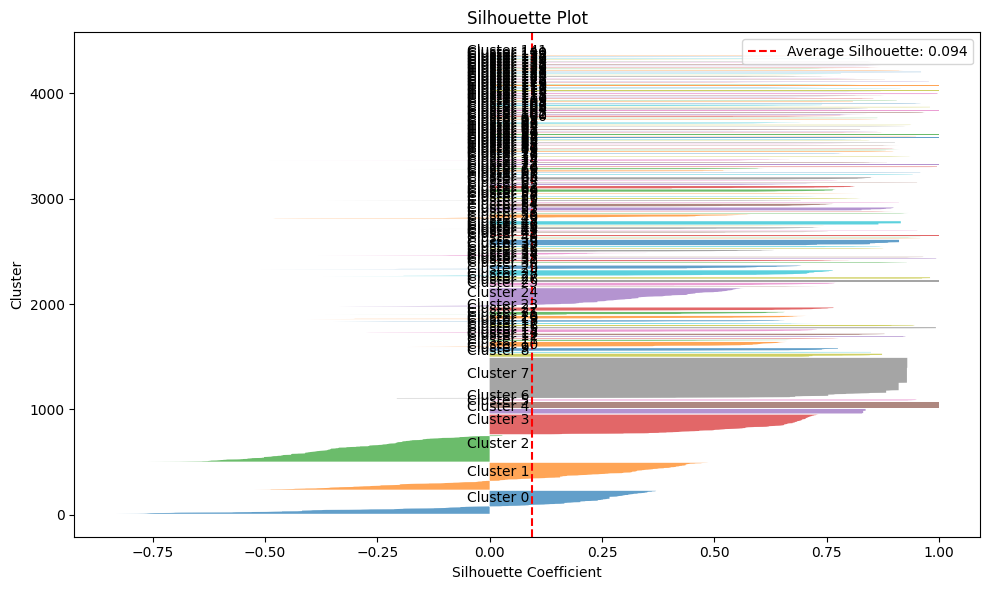

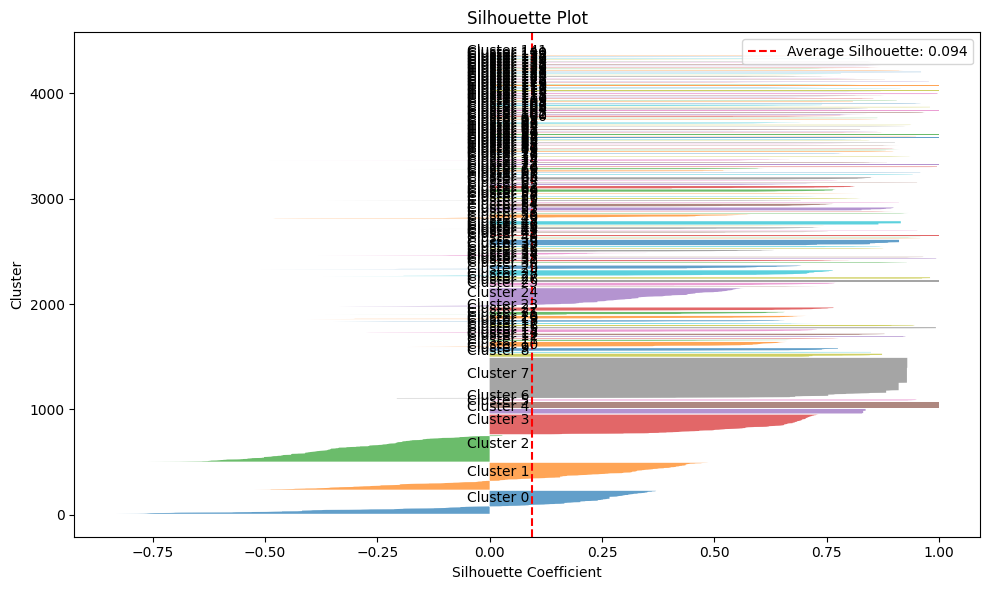

In [ ]:
plot_silhouette(filtered_data_dsbcan['silhouette dbscan'].values, silhouette_score(scaled_data_filtered, best_labels_filtered, metric='euclidean'), best_labels_filtered, n_clusters=len(set(best_labels_filtered)) - (1 if -1 in best_labels_filtered else 0))

In [ ]:
#Plotting with dbscan
data_sample
data_sample.groupby('cluster dbscan')[['lat', 'long']].mean()
# Create a folium map centered around the mean latitude and longitude of the clusters
map_clusters = folium.Map(location=[data_sample['lat'].mean(), data_sample['long'].mean()], zoom_start=12, control_scale=True)

# Add markers for each cluster center
for cluster_label, cluster_center in data_sample.groupby('cluster dbscan')[['lat', 'long']].mean().iterrows():
    folium.Marker(
        location=[cluster_center['lat'], cluster_center['long']],
        popup=f'Cluster {cluster_label}',
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map_clusters)

map_clusters

In [ ]:
#Plotting with dbscan filtered cluster center
filtered_data_dsbcan
filtered_data_dsbcan.groupby('cluster dbscan')[['lat', 'long']].mean()
# Create a folium map centered around the mean latitude and longitude of the clusters
map_clusters = folium.Map(location=[filtered_data_dsbcan['lat'].mean(), filtered_data_dsbcan['long'].mean()], zoom_start=12, control_scale=True)

# Add markers for each cluster center
for cluster_label, cluster_center in filtered_data_dsbcan.groupby('cluster dbscan')[['lat', 'long']].mean().iterrows():
    folium.Marker(
        location=[cluster_center['lat'], cluster_center['long']],
        popup=f'Cluster {cluster_label}',
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map_clusters)

map_clusters

In [ ]:
#Plotting with dbscan filtered cluster center
map_clusters
# Randomly sample 1500 objects from filtered_data_dsbcan
sampled_data = filtered_data_dsbcan.sample(n=1500)

# Create a folium map centered around the mean latitude and longitude of the sampled data
map_sampled_clusters = folium.Map(location=[sampled_data['lat'].mean(), sampled_data['long'].mean()], zoom_start=12, control_scale=True)

# Add markers for each sampled data point
# Define a color palette
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

# Add markers for each sampled data point with different colors for different clusters
for _, row in sampled_data[sampled_data['cluster dbscan'] != -1].iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f'Cluster {row["cluster dbscan"]}',
        icon=folium.Icon(color=colors[row["cluster dbscan"] % len(colors)], icon='info-sign')
    ).add_to(map_sampled_clusters)

map_sampled_clusters